# Confidence intervals

## Objectives:
* Look at sampling confidence intervals
* Look at frequentist confidence intervals

## Confidence intervals example

Based loosely on [A very friendly introduction to confidence intervals](https://towardsdatascience.com/a-very-friendly-introduction-to-confidence-intervals-9add126e714)

In [1]:
import numpy as np
import scipy.stats
import scipy.stats as stats
import matplotlib.pyplot as plt

Let's look at taking a small sample of a larger distribution. We'll use the same example given in the reference; this was a poll of the people in the US to see what fraction likes Soccer. Let's assume for the moment we know the real mean, and have the original distribution handy:

In [2]:
love_soccer_prop = 0.65  # Real percentage of people who love soccer
total_population = 325 * 10 ** 6  # Total population in the U.S. (325M)
# Note: 325e6 would be a floating point number

love_soccer_num = int(love_soccer_prop * total_population)

Bools are smaller than ints, and we can still take the mean, sum, etc. of an array of bools, so we'll use bools. We'll start off with a "sorted" array (people who love Soccer first), we we'll need to be careful when we select samples from it.

In [3]:
population = np.zeros(total_population, dtype=bool)
population[:love_soccer_num] = True

In [4]:
np.mean(population)

0.65

In [5]:
for i in range(10):
    sample = np.random.choice(population, size=1000)
    print(f"Sample {i}: {np.mean(sample)}")

Sample 0: 0.648
Sample 1: 0.646
Sample 2: 0.641
Sample 3: 0.642
Sample 4: 0.647
Sample 5: 0.659
Sample 6: 0.653
Sample 7: 0.65
Sample 8: 0.649
Sample 9: 0.661


In [6]:
values = np.empty(10_000)
for i in range(len(values)):
    values[i] = np.mean(np.random.choice(population, size=1_000))

In [7]:
np.mean(values)

0.6499281

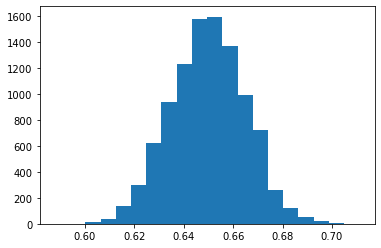

In [8]:
plt.hist(values, bins=20)
plt.show()

The T distribution (also called Student’s T Distribution) is a family of distributions that **look almost identical to the normal distribution curve, only a bit shorter and fatter** (heavier tails, which means that T distributions have a greater chance for extreme values than normal distributions). The t distribution is used instead of the normal distribution when you have small samples (in the language of statistics we say that we compare the t-score vs. z-score). The larger the sample size, the more the t distribution looks like the normal distribution. In fact, for sample sizes larger than 20 (e.g. more degrees of freedom), the distribution is almost exactly like the normal distribution.

Tail heaviness is determined by a parameter of the T distribution called degrees of freedom, with smaller values giving heavier tails, and with higher values making the T distribution resemble a standard normal distribution with a mean of 0, and a standard deviation of 1.

Z score is a conversion of raw data to a standard score, when the conversion is based on the population mean and population standard deviation. When a full data set is available with us, we can compute the Z score. Z score is the subtraction of the population mean from the raw score and then divides the result with population standard deviation. T score is a conversion of raw data to the standard score when the conversion is based on the sample mean and sample standard deviation

In [9]:
confidence = 0.95
sem = np.std(sample) / np.sqrt(len(sample))  # scipy.stats.sem(sample)
h = sem * scipy.stats.t.ppf((1 + confidence) / 2, len(sample) - 1)
print(f"{np.mean(sample)} +/- {h:.3g} ({confidence:.1%})")

0.661 +/- 0.0294 (95.0%)


For larger samples (more than 100), we can approximate the student's t distribution with a Gaussian:

In [ ]:
#Compute standard error of the mean
sem = scipy.stats.sem(sample)
h = sem * scipy.stats.norm.ppf((1 + confidence) / 2)
print(f"{np.mean(sample)} +/- {h:.3g} ({confidence:.1%})")

In SciPy, we can do this even quicker:

In [ ]:
h = scipy.stats.t.interval(confidence, len(sample) - 1, loc=np.mean(sample), scale=sem)
print(h)

Anaconda includes another popular package for statistics: StatsModels, which complements `scipy.stats` and `pandas`.

In [ ]:
import statsmodels.stats.api as sms

In [ ]:
inter = sms.DescrStatsW(sample).tconfint_mean()
inter

## Physics confidence intervals

Based on the excellent slides here: <http://www.phas.ubc.ca/~oser/p509/Lec_16.pdf>

For simplicity, we will assume that we are using 90% confidence intervals in the notes below.

In Physics, frequentist confidence intervals are often used for measurements. We make a measurement, then construct a confidence interval from the expected underlying probability distribution for the different possible measurements; we quote the true values for which our measurement is in the 90% range.

This does not tell us that there is a 90% chance the true value is in this range, rather that if we did this experiment many times, 90% of the experiments would contain the true value.

#### Neyman confidence interval construction:

1. Calculate the PDF of obtaining a measurement $\hat{a}$ from the true value $a$: $\mathrm{P}(\hat{a}|a)$
2. Define the interval where $\hat{a}$ has a 90% chance of occurring
3. Repeat for all possible true $a$

If we have the following distribution, the Neyman confidence interval construction *does not specify* how to draw the confidence region; any region that contains 90% of the probability could be a 90% confidence interval.

$$
\mathrm{PDF}(x) = x e^{-\frac{1}{2} x^2}
$$

In [ ]:
import sympy as s

s.init_printing()

In [ ]:
x = s.symbols("x")
f = x * s.exp(-(x ** 2) / 2)

In [ ]:
f.integrate(x)

This is normalized:

In [ ]:
f.integrate((x, 0, s.oo))

This is one region:

In [ ]:
f.integrate((x, 0.32, 2.45))

In [ ]:
fn = s.lambdify([x], f)

xs = np.linspace(0, 5, 100)
plt.plot(xs, fn(xs))
xs = np.linspace(0.32, 2.45, 50)
plt.fill_between(xs, fn(xs), color="C1", alpha=0.3)
plt.ylim(ymin=0)
plt.show()

You can also choose an upper limit:

In [ ]:
f.integrate((x, 0, 2.15))

In [ ]:
xs = np.linspace(0, 5, 100)
plt.plot(xs, fn(xs))
xs = np.linspace(0, 2.15, 50)
plt.fill_between(xs, fn(xs), color="C1", alpha=0.3)
plt.ylim(ymin=0)
plt.show()

How about this?

In [ ]:
f.integrate((x, 0, 1.09)) + f.integrate((x, 1.26, s.oo))

In [ ]:
xs = np.linspace(0, 5, 100)
plt.plot(xs, fn(xs))
xs = np.linspace(0, 1.09, 50)
plt.fill_between(xs, fn(xs), color="C1", alpha=0.3)
xs = np.linspace(1.26, 5, 50)
plt.fill_between(xs, fn(xs), color="C1", alpha=0.3)
plt.ylim(ymin=0)
plt.show()

#### Flip flop problem

Let's take the following example. Assume I am measuring from a Gaussian distribution where I know $\mu\ge0$:

$$
\mathrm{P}(\hat{\mu} | \mu) =
 \frac{1}{\sqrt{2\pi}}
 \exp{\left[
  -\frac{1}{2} \left(
  \mu - \hat{\mu}
  \right)^2
\right]}
$$

For fixed true value $\mu$, 90% of the probability lies in $\mu-1.28<\hat{\mu}<\infty$. Or $\mu-1.65<\hat{\mu}<\mu+1.65$.

In [ ]:
fig, ax = plt.subplots()

# Upper limit quote
x = np.linspace(0, 3)
ax.fill_between(x, 1.28 + x, alpha=0.3)

# Upper and lower bounds
x = np.linspace(3, 4)
ax.fill_between(x, 1.65 + x, x - 1.65, alpha=0.3)

# Quote as 0
x = np.linspace(-2, 0)
ax.fill_between(x, 1.28 + x * 0, alpha=0.3)

ax.set_xlim(-2, 4)
ax.set_ylim(0, 6)
ax.grid()
ax.set_aspect("equal")
plt.show()

#### Feldman-Cousins

A special prescription for building the limits intervals that transitions properly and avoids empty set when near a physical boundary (like 0) by using the following ordering ratio:

$$
R = \frac{P(x∣\mu)}
         {P(x∣\mu_\mathrm{best})}
$$

You simply select the 90% with the highest R.

From out previous example, $\mu_\mathrm{best}=x$ if $x>0$ or  $\mu_\mathrm{best}=0$ if $x\le 0$

#### Feldman-cousins from GammaPy (from pip)

In [ ]:
import gammapy.stats as gstats

In [ ]:
x_bins = np.arange(0, 50)
mu_bins = np.linspace(0, 15, int(15 / 0.005) + 1, endpoint=True)
matrix = [stats.poisson(mu + 3.0).pmf(x_bins) for mu in mu_bins]

In [ ]:
plt.plot(matrix[0], ".")
plt.plot(matrix[1000], ".")
plt.plot(matrix[2000], ".")
plt.plot(matrix[-1], ".")

In [ ]:
acceptance_intervals = gstats.fc_construct_acceptance_intervals_pdfs(matrix, 0.9)
LowerLimitNum, UpperLimitNum, other = gstats.fc_get_limits(
    mu_bins, x_bins, acceptance_intervals
)

In [ ]:
u = np.array([gstats.fc_find_limit(i, UpperLimitNum, mu_bins) for i in range(14)])
l = [gstats.fc_find_limit(i, LowerLimitNum, mu_bins) for i in range(14)]
plt.step(range(14), u, where="post", label="Upper limit")
plt.step(range(14), l, where="post", label="Lower limit")
plt.xticks(range(15))
plt.yticks(range(16))
plt.grid()
plt.xlabel("Measured")
plt.ylabel("True")
plt.show()